In [2]:
import numpy as np
import datetime
import cf_units
import xarray as xr
import os
import sys
import datetime as dt
import matplotlib as mpl
import copy

## plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import numpy.ma as ma
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import mplotutils as mpu
import seaborn as sns
import geopandas
import regionmask
import matplotlib.patheffects as pe

#loading data
from sklearn.externals import joblib
from matplotlib.colors import from_levels_and_colors
from matplotlib.colors import LogNorm, Normalize,LinearSegmentedColormap

/home/tristan/miniconda3/envs/mesmer-env/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
/home/tristan/miniconda3/envs/mesmer-env/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [3]:
## add land mask
# load the land mask as frac_l
dir_in_geo_dist = '/home/tristan/mesmer/data/'
frac_l = xr.open_mfdataset(dir_in_geo_dist + 'interim_invariant_lsmask_regrid.nc', combine='by_coords',decode_times=False)

frac_l_raw = np.squeeze(copy.deepcopy(frac_l.lsm.values))  #land-sea mask of ERA-interim bilinearily interpolated 

frac_l = frac_l.where(frac_l.lat>-60,0)  # remove Antarctica from frac_l field (ie set frac l to 0)

idx_l=np.squeeze(frac_l.lsm.values)>0.0 # idx_l = index land -> idex land #-> everything >0 we consider as land

lon_pc, lat_pc = mpu.infer_interval_breaks(frac_l.lon, frac_l.lat)  #

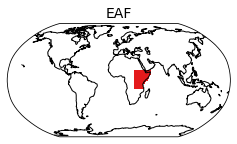

In [19]:
v_srex=np.array([-0.5,0.5,1.5])
cmap_srex, norm_srex = from_levels_and_colors(v_srex, colors=['white','#E41A1C'], extend='neither')
srex = xr.open_mfdataset('/home/tristan/mesmer/data/srex-region-masks_20120709.srex_mask_SREX_masks_all.25deg.time-invariant.nc', combine='by_coords',decode_times=False)
dir_srex_shape='/home/tristan/mesmer/data/referenceRegions/referenceRegions.shp'


df_all_regs = geopandas.read_file(dir_srex_shape)
srex_names = ['ALA','CGI','WNA','CNA','ENA','CAM','AMZ','NEB','WSA','SSA','NEU','CEU','MED','SAH','WAF','EAF','SAF',
             'NAS','WAS','CAS','TIB','EAS','SAS','SEA','NAU','SAU'] # SREX names ordered according to SREX mask I am
df_srex = df_all_regs.loc[df_all_regs['LAB'].isin(srex_names)] # alternative indexing: search in column LAB for names
reg='EAF'

idx_reg = srex_names.index(reg)+1 # index region
idx_reg_l = (srex.srex_mask.values[idx_l]==idx_reg)
idx_reg_l_grid = (srex.srex_mask.values==idx_reg) & idx_l


fig=plt.figure(figsize=(4,5))
ax_sub = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=0))
ax_sub.add_geometries(df_srex.geometry.values, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='k')


mesh_srex = ax_sub.pcolormesh(lon_pc, lat_pc, idx_reg_l_grid, cmap=cmap_srex,norm=norm_srex,transform=ccrs.PlateCarree(),rasterized=True)
ax_sub.coastlines()
ax_sub.set_title('EAF', fontsize=14)
plt.show()

<GeoAxesSubplot:>

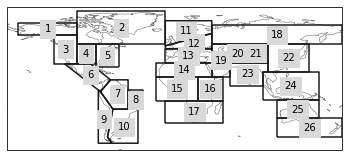

In [5]:
srex = regionmask.defined_regions.srex
srex.plot()

In [18]:
### set plot params

params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
          'figure.figsize': (9,5),
          "font.family": "serif",
         'ytick.labelsize':'x-large',
         "font.weight":"normal",
         "axes.labelweight":"normal"}
plt.rcParams.update(params)

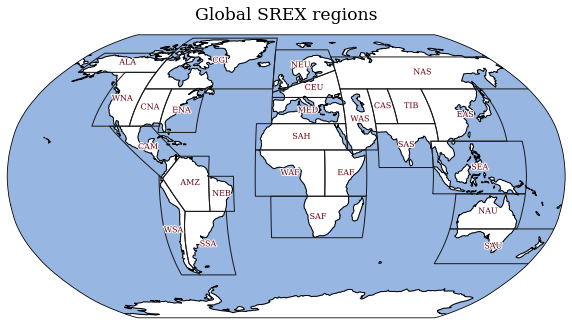

In [24]:
fig, ax = plt.subplots(figsize=(10,12), 
                       subplot_kw=dict(projection=ccrs.Robinson()))

srex.plot_regions(ax=ax, line_kws=dict(lw=1), text_kws=text_kws, label="abbrev")

ax.coastlines()
ax.add_feature(cfeature.OCEAN)
ax.set_global()

ax.set_title("Global SREX regions", pad=15)

plt.show()